* `imorts needed`

In [1]:
# major
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os , joblib
import missingno 

# sklearn
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer


In [2]:
# read dataset
file_path = os.path.join(os.getcwd(),'housing.csv')
df_housing= pd.read_csv(file_path)
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#show some statstics about the dataset
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# check for the nulls
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* `Expalaratory data analysis`

* `Univariate Visualization`

In [6]:
ocean_values = df_housing['ocean_proximity'].unique()
ocean_values
replicates =df_housing['ocean_proximity'].value_counts() 
replicates.index
ocean_values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

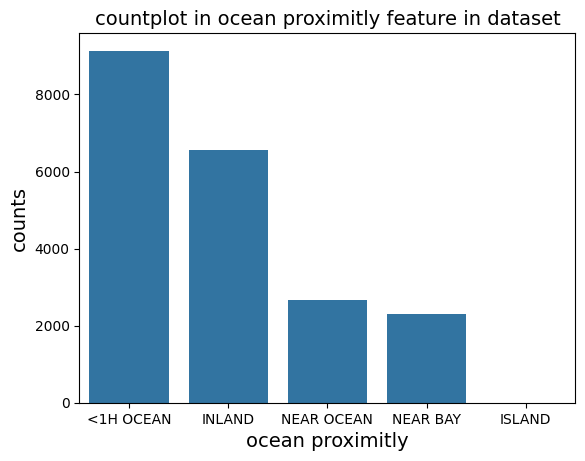

In [7]:
sns.countplot(x = 'ocean_proximity',data=df_housing,order=replicates.index)
plt.title("countplot in ocean proximitly feature in dataset",fontsize=14,c='k')
plt.xlabel("ocean proximitly",fontsize=14,c='k')
plt.ylabel("counts",fontsize=14,c='k')
plt.show()


In [8]:
df_housing['ocean_proximity']= df_housing['ocean_proximity'].replace('<1H OCEAN','1H OCEAN')
df_housing['ocean_proximity'].value_counts()

ocean_proximity
1H OCEAN      9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

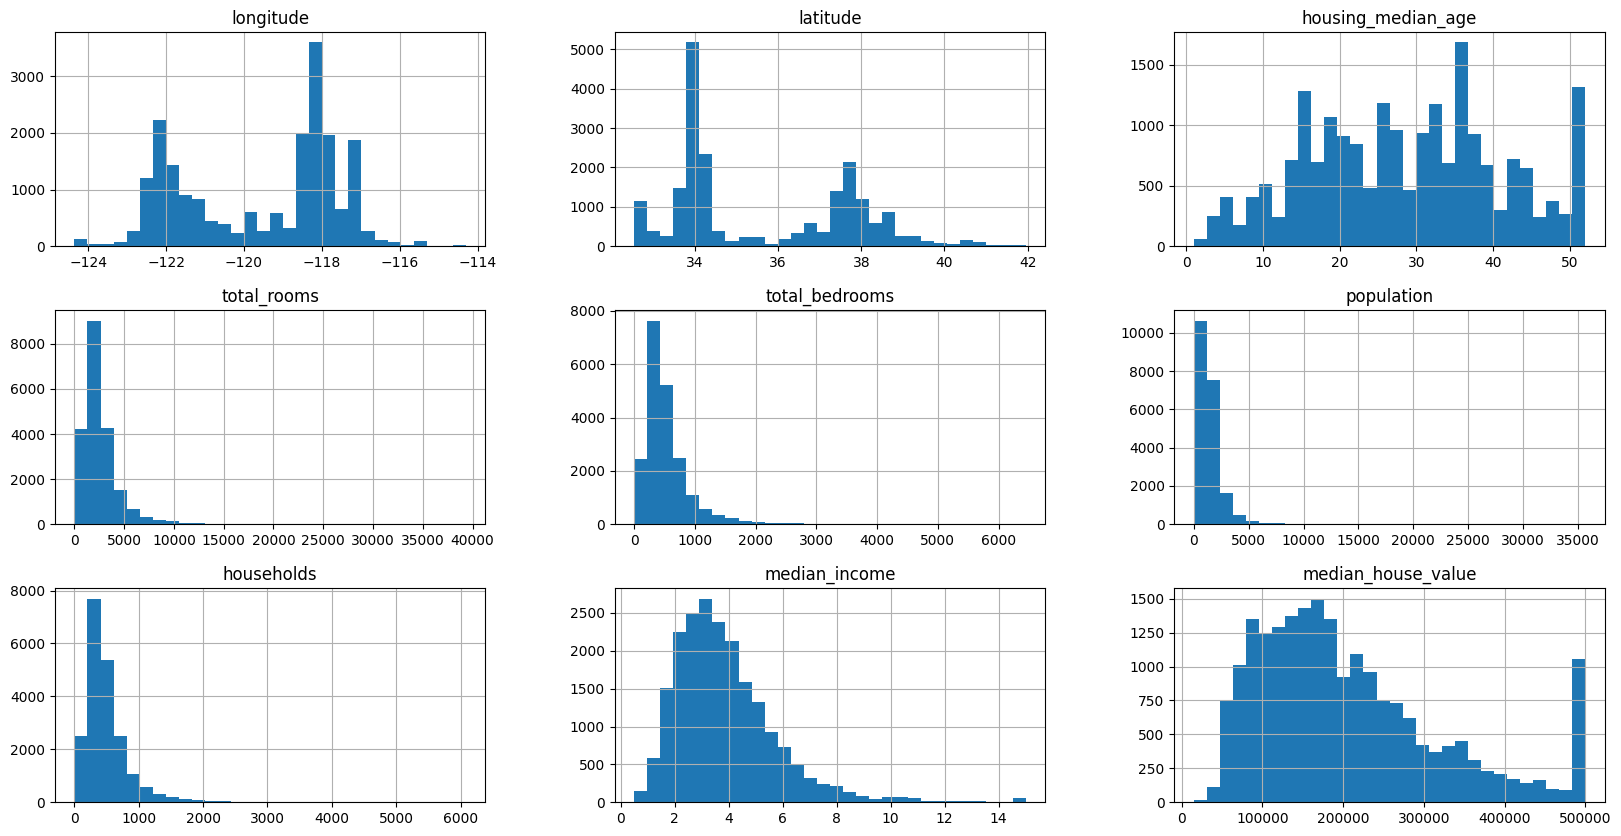

In [9]:
#histogram distr for numerical feature in dataset
df_housing.hist(bins = 30,figsize=(20,10))
plt.show()

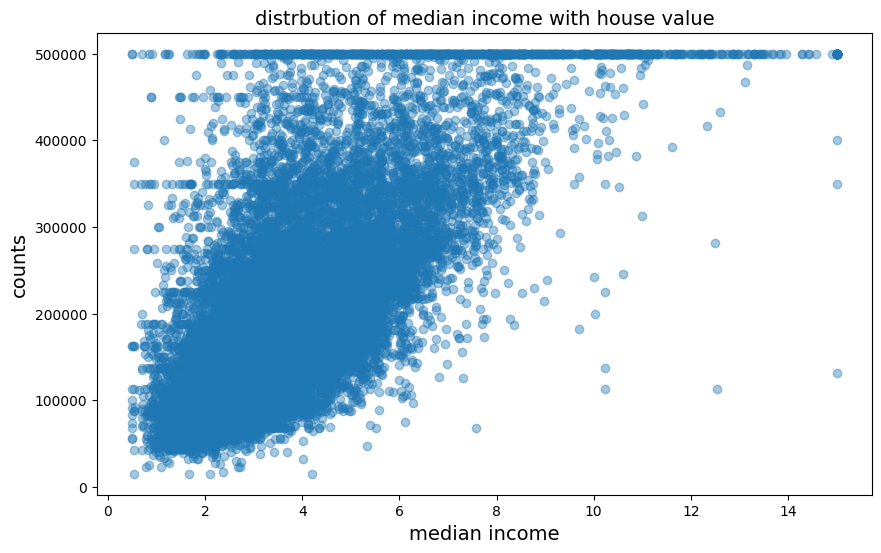

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(x=df_housing['median_income'],y=df_housing['median_house_value'],alpha = 0.4)
plt.title("distrbution of median income with house value",fontsize=14,c='k')
plt.xlabel("median income",fontsize=14,c='k')
plt.ylabel("counts",fontsize=14,c='k')
plt.show()

In [11]:
df_housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [12]:
house_value_bins = pd.cut(
    x=df_housing['median_house_value'],
    bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
    labels=['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k+']
)

house_value_bins

0        400k-500k
1        300k-400k
2        300k-400k
3        300k-400k
4        300k-400k
           ...    
20635       0-100k
20636       0-100k
20637       0-100k
20638       0-100k
20639       0-100k
Name: median_house_value, Length: 20640, dtype: category
Categories (6, object): ['0-100k' < '100k-200k' < '200k-300k' < '300k-400k' < '400k-500k' < '500k+']

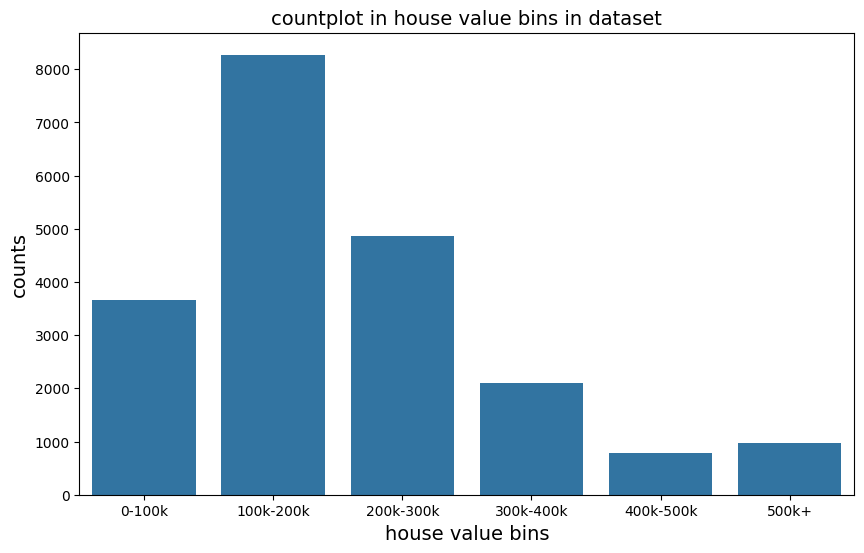

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x=house_value_bins)
plt.title("countplot in house value bins in dataset",fontsize=14,c='k')
plt.xlabel("house value bins",fontsize=14,c='k')
plt.ylabel("counts",fontsize=14,c='k')
plt.show()

In [14]:
df_housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [15]:
income_bins = pd.cut(
    x=df_housing['median_income'],
    bins=[-np.inf, 1.5, 3 , 4.5 , 6, np.inf],
    labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6','6<']
)

income_bins

0           6<
1           6<
2           6<
3        4.5-6
4        3-4.5
         ...  
20635    1.5-3
20636    1.5-3
20637    1.5-3
20638    1.5-3
20639    1.5-3
Name: median_income, Length: 20640, dtype: category
Categories (5, object): ['0-1.5' < '1.5-3' < '3-4.5' < '4.5-6' < '6<']

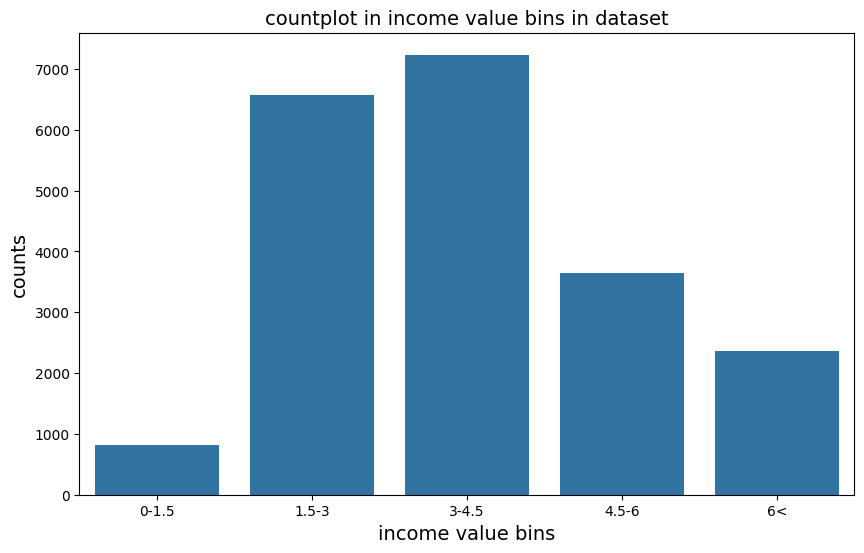

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x=income_bins)
plt.title("countplot in income value bins in dataset",fontsize=14,c='k')
plt.xlabel("income value bins",fontsize=14,c='k')
plt.ylabel("counts",fontsize=14,c='k')
plt.show()

* `Bivariate visualization`

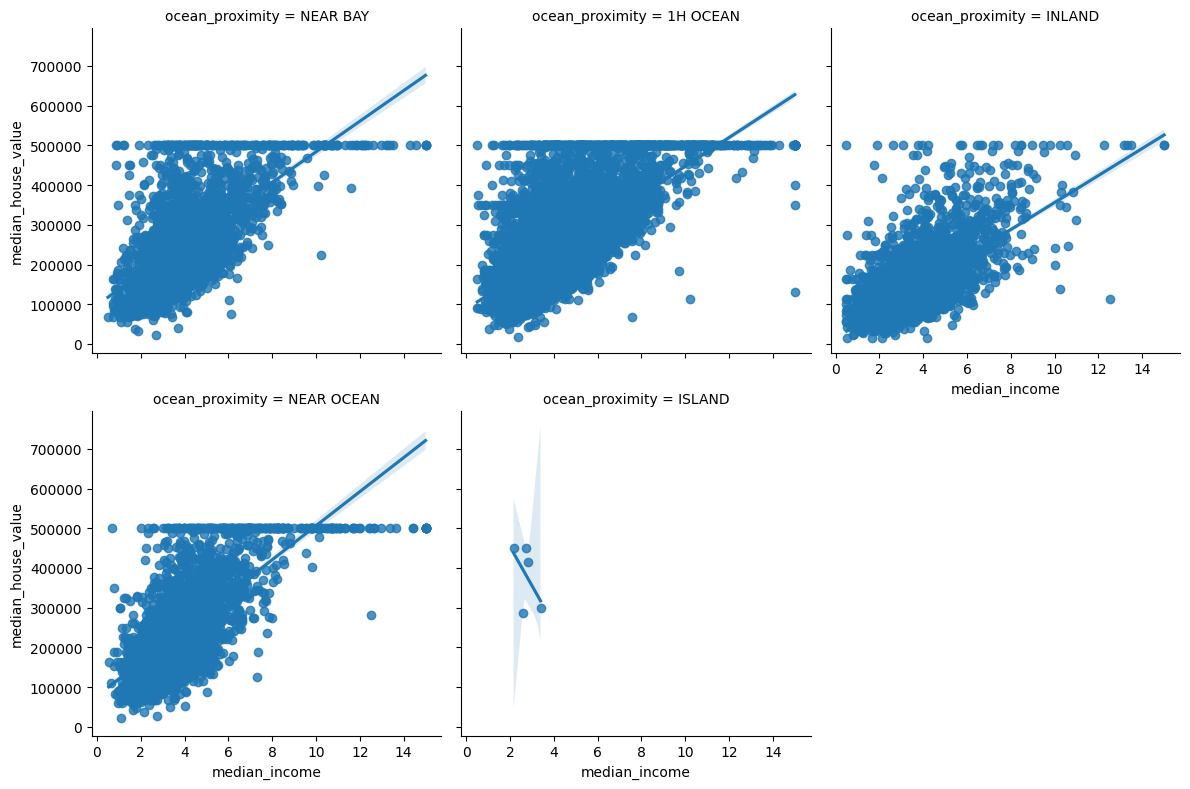

In [17]:

sns.lmplot(
    x='median_income',
    y='median_house_value',
    data=df_housing,
    col='ocean_proximity',  # Corrected spelling from 'cean_proximity'
    col_wrap=3,  # Optional, 'scatter' is the default when using lmplot
    height=4,        # Optional: control the size of each facet
    aspect=1         # Optional: control the aspect ratio
)
plt.show()


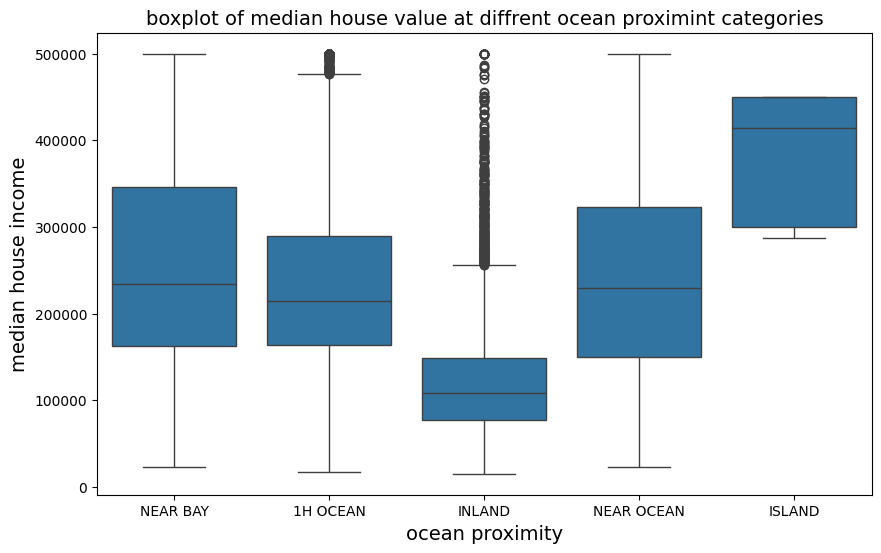

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(y='median_house_value',data=df_housing,x='ocean_proximity')
plt.title("boxplot of median house value at diffrent ocean proximint categories",fontsize=14,c='k')
plt.xlabel("ocean proximity",fontsize=14,c='k')
plt.ylabel("median house income",fontsize=14,c='k')
plt.show()

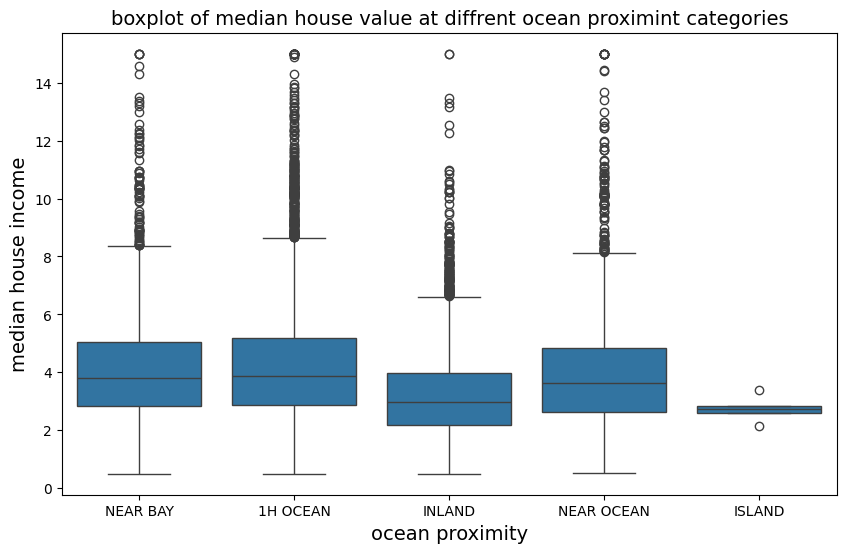

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(y='median_income',data=df_housing,x='ocean_proximity')
plt.title("boxplot of median house value at diffrent ocean proximint categories",fontsize=14,c='k')
plt.xlabel("ocean proximity",fontsize=14,c='k')
plt.ylabel("median house income",fontsize=14,c='k')
plt.show()

* `multivariate visualization`

In [20]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


C:\Users\youssef gerges\AppData\Local\Temp\ipykernel_5484\2326318656.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


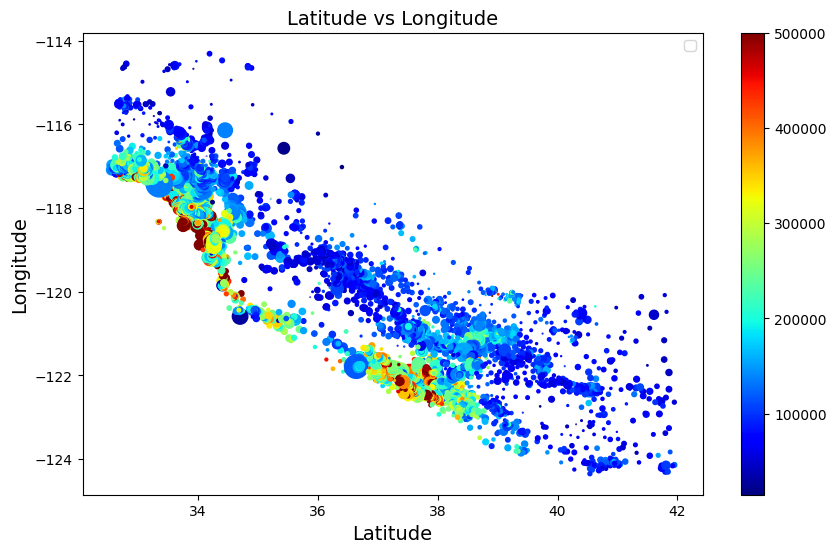

In [21]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(x=df_housing['latitude'], y=df_housing['longitude'],s=df_housing['population']/100
            ,c=df_housing['median_house_value'],cmap=plt.get_cmap('jet'))
plt.colorbar(sc)
plt.xlabel('Latitude',fontsize=14,c='k')
plt.ylabel('Longitude',fontsize=14,c='k')
plt.title('Latitude vs Longitude',fontsize=14,c='k')
plt.legend()
plt.show()

* `check the correlation between the Feature and Target`

In [22]:
df_housing.corr

<bound method DataFrame.corr of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [23]:
# Drop the non-numeric 'ocean_proximity' column
df_housing_numeric = df_housing.drop(columns=['ocean_proximity'])

df_housing_numeric.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [24]:
df_housing_numeric.corr()['median_house_value'].value_counts(ascending=False)

median_house_value
-0.045967    1
-0.144160    1
 0.105623    1
 0.134153    1
 0.049686    1
-0.024650    1
 0.065843    1
 0.688075    1
 1.000000    1
Name: count, dtype: int64

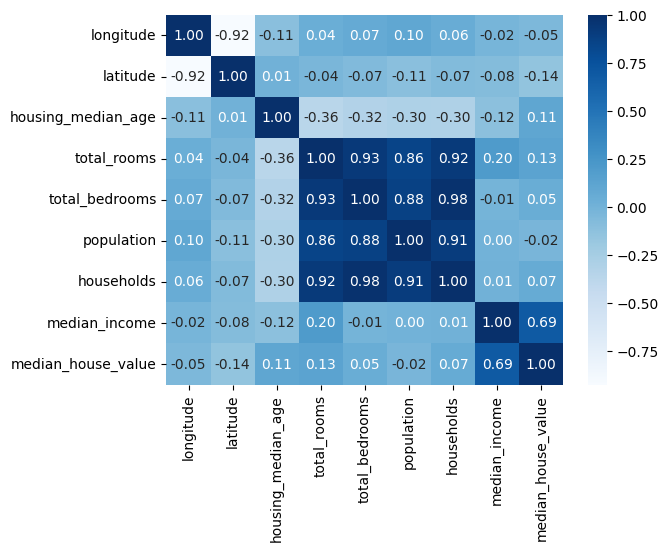

In [25]:
sns.heatmap(df_housing_numeric.corr(),annot=True,cmap='Blues',fmt='.2f')
plt.show()

* `Split dataset`

In [26]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [27]:
X = df_housing.drop('median_house_value',axis = 1)
y = df_housing['median_house_value']

In [28]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [29]:
X.shape


(20640, 9)

In [30]:
X_train, X_test , y_train , y_test=train_test_split(X,y,shuffle=True,test_size=0.15,random_state=42)

In [31]:
print("X_train shape",X_train.shape)
print("t_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (17544, 9)
t_train shape (17544,)
X_test shape (3096, 9)
y_test shape (3096,)


* `Dealing with nulls`

In [32]:
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int32','int64','float32','float64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['int32','int64','float32','float64']]
categ_cols


['ocean_proximity']

In [33]:
num_pipline = Pipeline(steps = [
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())
                ])

categ_pipline = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='constant',fill_value='missing')),
    ('ohe',OneHotEncoder(sparse_output=  False))
])

all_pipeline = ColumnTransformer(transformers=[
                    ('numerical', num_pipline, num_cols),
                    ('categorical', categ_pipline, categ_cols),
                ])

X_train_final = all_pipeline.fit_transform(X_train)
X_test_final = all_pipeline.transform(X_test)

In [34]:
X_train_final.shape, X_test_final.shape

((17544, 13), (3096, 13))

In [35]:
y_train.shape,y_test.shape

((17544,), (3096,))

In [36]:
# Dump the pipeline locally in ARTIFACTS_FOLDER_PATH
ARTIFACTS_FOLDER_PATH = os.path.join(os.getcwd(), '..', 'artifacts')
os.makedirs(ARTIFACTS_FOLDER_PATH, exist_ok=True)

In [37]:
# Dump the pipeline locally --> Serialzation
joblib.dump(all_pipeline, os.path.join(ARTIFACTS_FOLDER_PATH, 'pipeline.pkl'))

['c:\\depi\\projects\\project 1 housing prediction\\notebooks\\..\\artifacts\\pipeline.pkl']

# `Building ML Models`

evaluation metric : RMSE


* `Linear Regression`

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_final,y_train)
 
# predict
y_pred_train_lin = lin_reg.predict(X_train_final)
y_pred_test_lin = lin_reg.predict(X_test_final)

# Evaluate
rmse_train_lin =np.sqrt( mean_squared_error(y_train, y_pred_train_lin))
rmse_test_lin = np.sqrt(mean_squared_error(y_test, y_pred_test_lin))

print(f'RMSE for Training using LinearRegression is: {rmse_train_lin:.3f}')
print(f'RMSE for Testing using LinearRegression is: {rmse_test_lin:.3f}')

RMSE for Training using LinearRegression is: 68393.845
RMSE for Testing using LinearRegression is: 70869.545


* `RandomForestRegressor`

In [39]:
X_train_final.shape

(17544, 13)

In [40]:
forest_reg = RandomForestRegressor(n_estimators=500, max_depth=30, random_state=45)
forest_reg.fit(X_train_final,y_train)

# Predict and evaluate
y_pred_train_forest = forest_reg.predict(X_train_final)
y_pred_test_foerst = forest_reg.predict(X_test_final)

# Using fRMSE
RMSE_train_forest = np.sqrt(mean_squared_error(y_train, y_pred_train_forest))
RMSE_test_forest = np.sqrt(mean_squared_error(y_test, y_pred_test_foerst))

print(f'The RMSE using root mean squared error model for Training Dataset  {RMSE_train_forest:.3f}')
print(f'The RMSE using root mean squared error model for Testing Dataset  {RMSE_test_forest:.3f}')

The RMSE using root mean squared error model for Training Dataset  17730.569
The RMSE using root mean squared error model for Testing Dataset  49333.160


* `Tuning RF using GridSearchCV`

In [41]:
forest_reg = RandomForestRegressor(n_estimators=300, max_depth=15, 
                                    max_features=0.8, random_state=45)

# Params to search in
params_best_grid = {
    'n_estimators': np.arange(250, 400, 50),
    'max_depth': np.arange(10, 20, 2)
}

# GridSearchCV
grid_forest = GridSearchCV(estimator=forest_reg, param_grid=params_best_grid, cv=5, scoring='neg_mean_squared_error', verbose=4)
grid_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END max_depth=10, n_estimators=250;, score=-2756733504.114 total time=   9.5s
[CV 2/5] END max_depth=10, n_estimators=250;, score=-2985547784.935 total time=   9.7s
[CV 3/5] END max_depth=10, n_estimators=250;, score=-2876879452.078 total time=   9.6s
[CV 4/5] END max_depth=10, n_estimators=250;, score=-2688193475.894 total time=   9.6s
[CV 5/5] END max_depth=10, n_estimators=250;, score=-2955985946.637 total time=   9.5s
[CV 1/5] END max_depth=10, n_estimators=300;, score=-2755378286.928 total time=  11.5s
[CV 2/5] END max_depth=10, n_estimators=300;, score=-2981718450.175 total time=  11.7s
[CV 3/5] END max_depth=10, n_estimators=300;, score=-2874226282.100 total time=  11.3s
[CV 4/5] END max_depth=10, n_estimators=300;, score=-2683753214.379 total time=  11.5s
[CV 5/5] END max_depth=10, n_estimators=300;, score=-2944146254.178 total time=  11.4s
[CV 1/5] END max_depth=10, n_estimators=350;, score=-2754542775.180 t

c:\Users\youssef gerges\anaconda3\envs\Project\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=15, max_features=0.8,
                                             n_estimators=300,
                                             random_state=45),
             param_grid={'max_depth': array([10, 12, 14, 16, 18]),
                         'n_estimators': array([250, 300, 350])},
             scoring='neg_mean_squared_error', verbose=4)

In [43]:
grid_forest.best_score_

np.float64(-2378150686.4399242)

In [44]:
grid_forest.best_params_

{'max_depth': np.int64(18), 'n_estimators': np.int64(250)}

In [46]:
# The forest after tuning
forest_tuned = grid_forest.best_estimator_
forest_tuned.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_forest_tuned = forest_tuned.predict(X_train_final)
y_pred_test_foerst_tuned = forest_tuned.predict(X_test_final)

# Using f1_score
score_train_forest_tuned =np.sqrt(mean_squared_error(y_train, y_pred_train_forest_tuned))
score_test_forest_tuned = np.sqrt(mean_squared_error(y_test, y_pred_test_foerst_tuned))

print(f'The RMSE using tuned RF model for Training Dataset with class_weigths is {score_train_forest_tuned:.3f}')
print(f'The RMSE using tuned RF model for Testing Dataset with class_weigths is {score_test_forest_tuned:.3f}')

The RMSE using tuned RF model for Training Dataset with class_weigths is 20081.348
The RMSE using tuned RF model for Testing Dataset with class_weigths is 48867.383


* `XGBoost`

In [47]:
scale = np.bincount(y_train)[0] / np.bincount(y_train)[1]

C:\Users\youssef gerges\AppData\Local\Temp\ipykernel_5484\2366938159.py:1: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  scale = np.bincount(y_train)[0] / np.bincount(y_train)[1]
C:\Users\youssef gerges\AppData\Local\Temp\ipykernel_5484\2366938159.py:1: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.bincount(y_train)[0] / np.bincount(y_train)[1]


In [48]:
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=250, max_depth=20, learning_rate=0.001)
xgb_reg.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_xgb = xgb_reg.predict(X_train_final)
y_pred_test_xgb = xgb_reg.predict(X_test_final)

# Using f1_score
score_train_xgb=np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
score_test_xgb =np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))

print(f'The RMSE using XGBoost model for Training Dataset {score_train_xgb:.3f}')
print(f'The RMSE using XGBoost model for Testing Dataset  {score_test_xgb:.3f}')

The RMSE using XGBoost model for Training Dataset 92900.470
The RMSE using XGBoost model for Testing Dataset  95428.271


In [50]:
joblib.dump(lin_reg, os.path.join(ARTIFACTS_FOLDER_PATH, 'lin_reg.pkl'), compress=9)
joblib.dump(forest_reg, os.path.join(ARTIFACTS_FOLDER_PATH, 'forest_reg.pkl'), compress=9)
joblib.dump(xgb_reg, os.path.join(ARTIFACTS_FOLDER_PATH, 'Xgboost.pkl'), compress=9)
joblib.dump(forest_tuned , os.path.join(ARTIFACTS_FOLDER_PATH, 'forest_tuned.pkl'), compress=9)


['c:\\depi\\projects\\project 1 housing prediction\\notebooks\\..\\artifacts\\forest_tuned.pkl']